In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score , recall_score , f1_score , roc_curve , roc_auc_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#Load the dataset using pandas

In [2]:
dt=pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dt

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0



#Display the first few rows of the dataset

In [3]:
dt.head(6)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0




#Check for missing values and handle them if any

In [4]:
dt.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


#Display summary statistics and data types of each feature

In [5]:
dt.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
fig1=px.histogram(dt,x="Sex",y="Smoker",color="Diabetes_binary")
fig1.show()

In [7]:
fig2=px.histogram(dt,x="Age",y="BMI",color="Diabetes_binary")
fig2.show()

In [8]:
dt_corry=dt.corr()
fig3=px.imshow(dt_corry)
fig3.update_layout(
    title_font_size=22,
    title_x=0.5,
    width=800,
    height=700,
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig3.show()

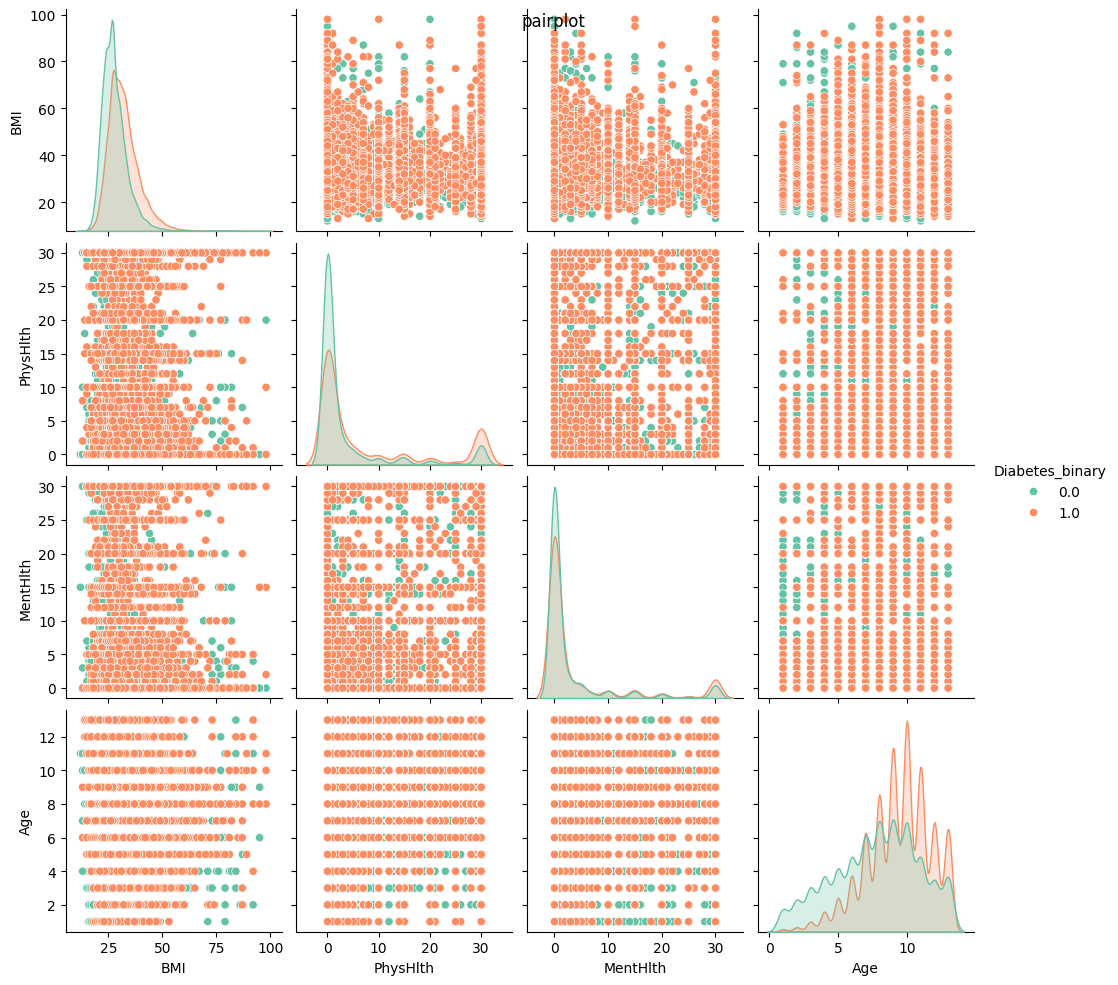

In [9]:
fig4=sns.pairplot(dt[['BMI','PhysHlth','MentHlth','Age','Diabetes_binary']],hue="Diabetes_binary",palette='Set2')
plt.suptitle("pairplot")
plt.show()

#Feature Engineering and Preprocessing

In [10]:
dt.dtypes

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


#Scale numerical features using StandardScaler

In [11]:
numerical_features = dt.select_dtypes(include='float64').columns
scaler=StandardScaler()
dt[numerical_features]=scaler.fit_transform(dt[numerical_features])

#Split the data into training and testing sets

In [12]:
x_train,x_test,y_train,y_test=train_test_split(dt.drop("Diabetes_binary",axis=1),dt["Diabetes_binary"],test_size=0.2,random_state=42)

#Logistic Regression

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
model.score(x_train,y_train)

0.7479355648683536

In [15]:
model.score(x_test,y_test)

0.7484263384963576

In [47]:
y_pred_log=model.predict(x_test)
y_pred_log

array([ 1.,  1., -1., ..., -1., -1.,  1.])

In [17]:
precision=precision_score(y_test,model.predict(x_test))
precision

0.7372282608695652

In [18]:
recall=recall_score(y_test,model.predict(x_test))
recall

0.7697545751170379

In [19]:
f1=f1_score(y_test,model.predict(x_test))
f1

0.7531403983621348

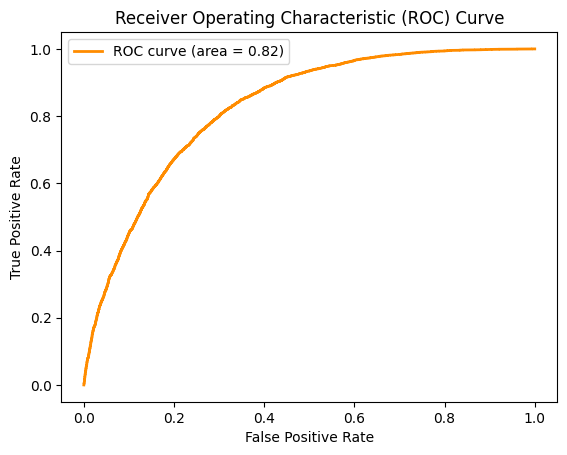

In [37]:
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [21]:
auc_score=roc_auc_score(y_test,y_proba)
auc_score

0.8248611422640748

# K-Nearest Neighbors (KNN)

In [22]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
model2.score(x_train,y_train)

0.7971990875815607

In [48]:
y_pred_knn=model2.predict(x_test)
y_pred_knn

array([-1.,  1., -1., ...,  1., -1.,  1.])

In [44]:
model2.score(x_test,y_test)

0.71016337789094

In [28]:
best_prams= {"n_neighbors" : list(range(1,31))}
grid=GridSearchCV(model2,best_prams,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [29]:
best_prams=grid.best_params_['n_neighbors']
best_prams

29

In [30]:
best_score= grid.best_score_
best_score

0.7384046358790506

In [26]:
precision_score= precision_score(y_test,model2.predict(x_test))
precision_score

0.6978677752447365

In [27]:
recall_score= recall_score(y_test,model2.predict(x_test))
recall_score

0.7382607462051355

In [30]:
f1_score= f1_score(y_test,model2.predict(x_test))
f1_score

0.7174962084654626

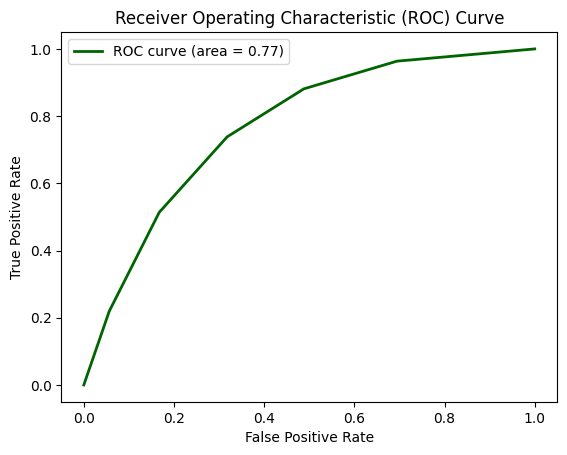

In [40]:
y_proba2 = model2.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba2)
roc_auc2 = roc_auc_score(y_test, y_proba2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Compare the ROC curves of logistic regression and KNN.

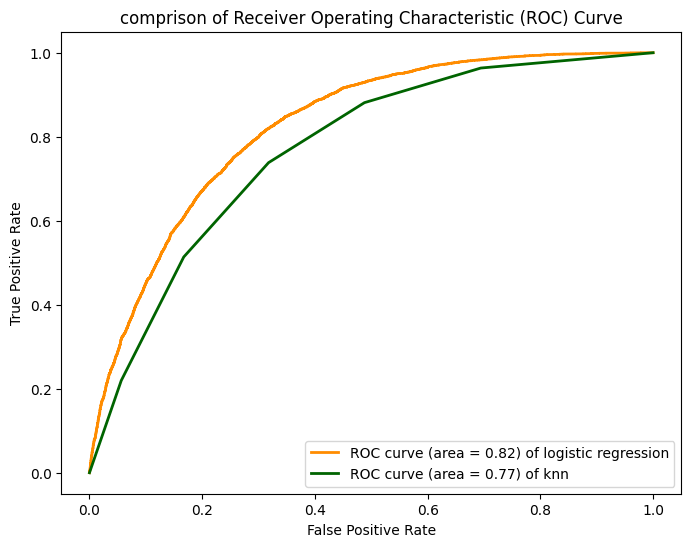

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f) of logistic regression' % roc_auc)
plt.plot(fpr2, tpr2, color='darkgreen', lw=2, label='ROC curve (area = %0.2f) of knn' % roc_auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('comprison of Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Compare the performance of both models using confusion matrices.

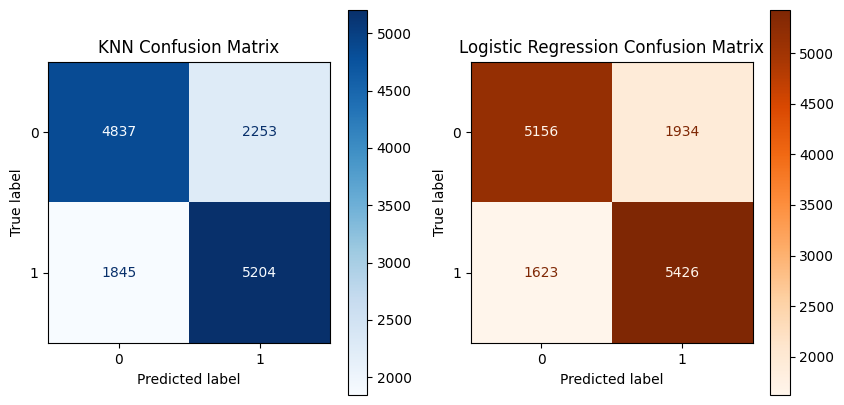

In [52]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_log = confusion_matrix(y_test, y_pred_log)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ConfusionMatrixDisplay(cm_knn).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('KNN Confusion Matrix')

ConfusionMatrixDisplay(cm_log).plot(ax=ax[1], cmap='Oranges')
ax[1].set_title('Logistic Regression Confusion Matrix')

plt.show()